# CLASSIFY TRAFFIC SIGNS

Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



- ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
- ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
- ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
- ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
- ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
- (10, b'No passing for vehicles over 3.5 metric tons')
- (11, b'Right-of-way at the next intersection') (12, b'Priority road')
- (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
- (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
- (18, b'General caution') (19, b'Dangerous curve to the left')
- (20, b'Dangerous curve to the right') (21, b'Double curve')
- (22, b'Bumpy road') (23, b'Slippery road')
- (24, b'Road narrows on the right') (25, b'Road work')
- (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
- (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
- (31, b'Wild animals crossing')
- (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
- (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
- (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
- (40, b'Roundabout mandatory') (41, b'End of no passing')
- (42, b'End of no passing by vehicles over 3.5 metric tons')


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
# import libraries 
import pickle

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [49]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
    
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
    
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [50]:
X_train, y_train = train['features'], train['labels']

X_validation, y_validation = valid['features'], valid['labels']

X_test, y_test = test['features'], test['labels']


In [51]:
X_train.shape

(34799, 32, 32, 3)

In [52]:
y_train.shape

(34799,)

# IMAGE EXPLORATION

26

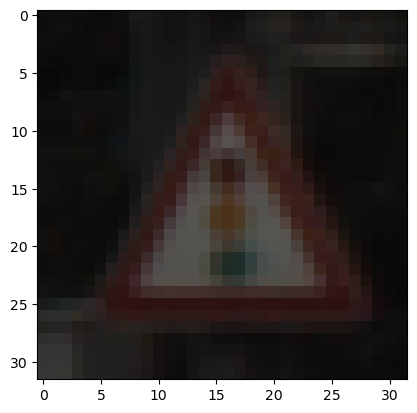

In [53]:
i = 1342
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# DATA PEPARATION

In [54]:
## Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [55]:
# Convert to grayscale

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)

X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)

X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [56]:
# Scale and normalization

X_train_gray_norm = (X_train_gray - 128)/128 

X_test_gray_norm = (X_test_gray - 128)/128

X_validation_gray_norm = (X_validation_gray - 128)/128


In [57]:
X_train_gray.shape

(34799, 32, 32, 1)

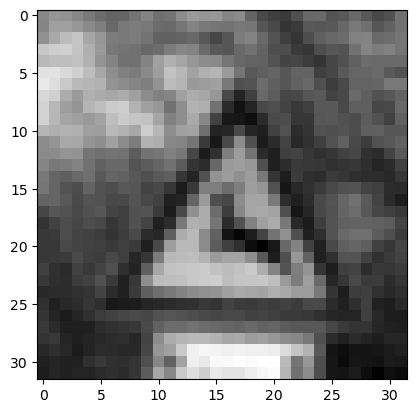

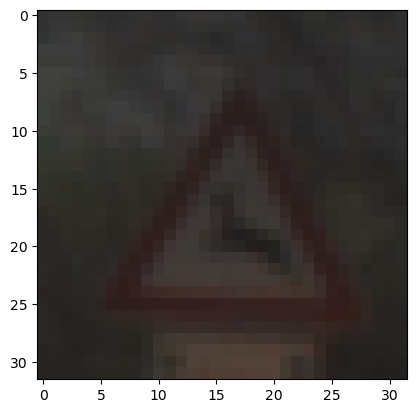

In [58]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


# MODEL TRAINING

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [60]:
image_shape = X_train_gray[i].shape

In [61]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu')) # Convolutional layer
cnn_model.add(MaxPooling2D(pool_size = (2, 2))) # Perform max pooling
cnn_model.add(Flatten()) # Flattening
cnn_model.add(Dense(32, activation = 'relu')) # Add fully connected network layer
cnn_model.add(Dense(43, activation = 'sigmoid')) # Output layer (# matches number of traffic sign category)


In [62]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [63]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 1s 10ms/step - loss: 3.4585 - accuracy: 0.0881 - val_loss: 3.3356 - val_accuracy: 0.1367
Epoch 2/50
70/70 [==============================] - 1s 9ms/step - loss: 2.9751 - accuracy: 0.2352 - val_loss: 2.9553 - val_accuracy: 0.2190
Epoch 3/50
70/70 [==============================] - 1s 10ms/step - loss: 2.4774 - accuracy: 0.3547 - val_loss: 2.5187 - val_accuracy: 0.3465
Epoch 4/50
70/70 [==============================] - 1s 9ms/step - loss: 2.0602 - accuracy: 0.4481 - val_loss: 2.2253 - val_accuracy: 0.4032
Epoch 5/50
70/70 [==============================] - 1s 9ms/step - loss: 1.7654 - accuracy: 0.5161 - val_loss: 1.9781 - val_accuracy: 0.4501
Epoch 6/50
70/70 [==============================] - 1s 9ms/step - loss: 1.5443 - accuracy: 0.5723 - val_loss: 1.8460 - val_accuracy: 0.5002
Epoch 7/50
70/70 [==============================] - 1s 10ms/step - loss: 1.3809 - accuracy: 0.6121 - val_loss: 1.7101 - val_accuracy: 0.5283
Epoch 8/50
70/70 

In [64]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.7363


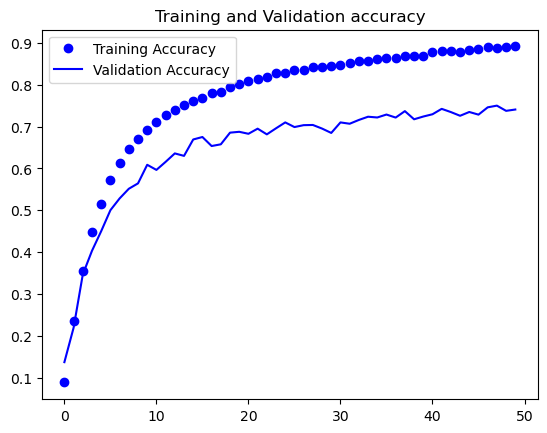

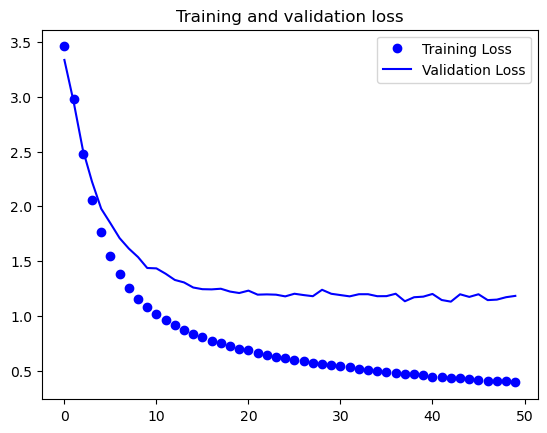

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [66]:
# Get the predictions for the test data

predict_x = cnn_model.predict(X_test_gray_norm)
predicted_classes = np.argmax(predict_x, axis=1)

# Get the indices to be plotted
y_true = y_test


395/395 [==============================] - 0s 665us/step


In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
cm

# Diagonal elements shows the number of correctly classified images

array([[ 21,  15,  14, ...,   0,   0,   0],
       [ 90, 466, 115, ...,   4,   0,   0],
       [ 78,  90, 510, ...,   5,   0,   0],
       ...,
       [  0,   1,  19, ...,  25,   0,   2],
       [  0,   0,   2, ...,   0,   8,   0],
       [  0,   0,   0, ...,   0,   5,  54]], dtype=int64)

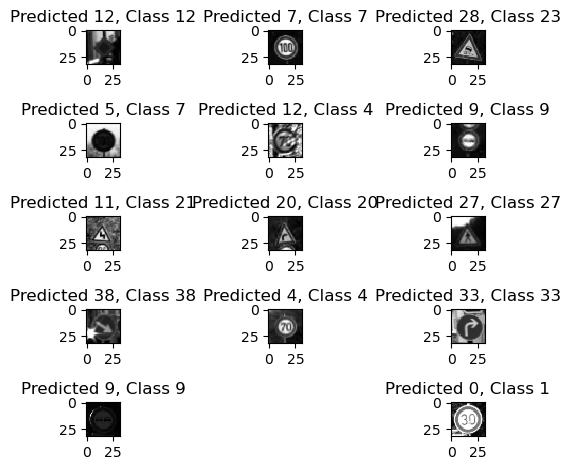

In [70]:
# Plot images and see how well out model did

for i in range(0,15):
    plt.subplot(5,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()